In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
import scipy
from scipy.stats import ks_2samp

In [2]:
df=pd.read_csv(r'/home/unipi/v.vichi3/Desktop/dataframe.csv')

In [3]:
df.head()

ID         a         e         i          om           w  \
0  '0000001'  2.662454  0.533875  26.69427   19.950131  284.514731   
1  '0000002'  1.457965  0.222633  10.82898  209.642798  343.753667   
2  '0000003'  1.893819  0.538294  41.18978  286.606414  287.585635   
3  '0000004'  2.001212  0.448742  17.44771  214.338458  245.558687   
4  '0000005'  4.221445  0.713243  30.98228  206.677675  330.127884   

           ma  H-value    MOID    EPOCH  PHA  
0   14.514345     9.45  0.4615  59945.0  0.0  
1  338.406046    11.16  0.1356  59945.0  0.0  
2   83.688834    12.40  0.1162  59945.0  0.0  
3   15.816629    12.60  0.2447  59945.0  0.0  
4  117.375359    12.90  0.2592  59945.0  0.0

In [4]:
kep=df.iloc[:,1:6]
y=df.iloc[:,-3]
X=kep.to_numpy()
y=y.to_numpy()

In [5]:
#Split the data into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=750000)

In [6]:
df_train=pd.DataFrame(X_train, columns=['a','e','i','om','w'])
df_test=pd.DataFrame(X_test, columns=['a','e','i','om','w'])
ydf_train=pd.DataFrame(y_train, columns=['MOID'])
ydf_test=pd.DataFrame(y_test,columns=['MOID'])

In [7]:
#Comparison of some statistical measures between training and test set 
A_train=df_train.describe()
A_test=df_test.describe()
B_train=ydf_train.describe()
B_test=ydf_test.describe()

In [8]:
A_train.iloc[1:,:]-A_test.iloc[1:,:] 
#the first row of the describe method is the count of objects, so we ignore it

a         e         i        om         w
mean  0.002937 -0.000607  0.027988  0.420302  0.343676
std  -0.001472  0.000403  0.064839 -0.227066  0.136723
min  -0.000002 -0.001717 -0.049321 -0.000011 -0.023646
25%   0.005710 -0.000832  0.016489  1.228961  0.372439
50%   0.009029 -0.000021  0.066847  0.206380  0.186781
75%   0.000243 -0.000705 -0.010827 -0.018515  0.263608
max   0.027082  0.000222  3.584705  0.001342  0.022134

<Axes: >

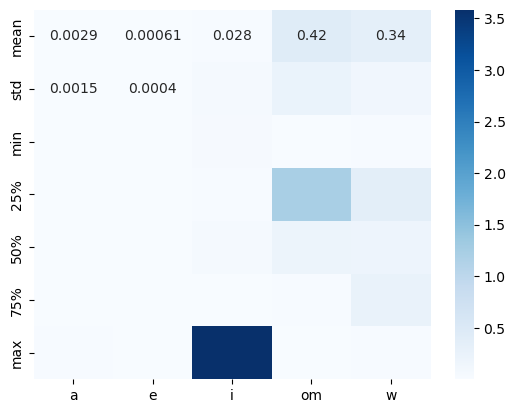

In [9]:
sns.heatmap(np.absolute(A_train.iloc[1:,:]-A_test.iloc[1:,:]),annot=True,cmap='Blues')

In [10]:
B_train.iloc[1:,:]-B_test.iloc[1:,:]

MOID
mean  0.000081
std  -0.000106
min   0.000000
25%   0.000000
50%   0.000600
75%   0.000700
max   0.099600

<Axes: >

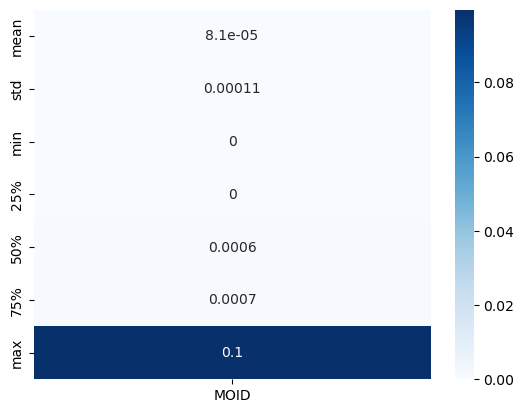

In [11]:
sns.heatmap(np.absolute(B_train.iloc[1:,:]-B_test.iloc[1:,:]),annot=True, cmap='Blues')

In [12]:
#Perform the Kolmogorov-Smirnov two-sample test to check that the training and test set are drawn from the same distributions
#The null hypothesis is that the distributions are the same
#We choose a confidence level of 99%, that is we will reject the null hypothesis in favour of the alternative if the p-value is less than 0.01
#First compute the KS test statistic and the p-value for all the variables a,e,i,om,w,MOID 
distances=list(map(lambda i:
                   ks_2samp(df_train.iloc[:,i],df_test.iloc[:,i]).statistic, 
                   range(df_train.shape[1])))
pvalues=list(map(lambda i:
                   ks_2samp(df_train.iloc[:,i],df_test.iloc[:,i]).pvalue,
                   range(df_train.shape[1])))

for i in range(df_train.shape[1]):
    print(df_train.columns[i], ": distance:", distances[i], "p-value: ", pvalues[i])

a : distance: 0.004706798228196085 p-value:  0.2274892259071406
e : distance: 0.0034702911257064317 p-value:  0.5959712249062891
i : distance: 0.001685299119189354 p-value:  0.9990253593864518
om : distance: 0.004452073316022598 p-value:  0.2855013975223749
w : distance: 0.0037016791405732885 p-value:  0.5122989577027215


In [13]:
print("MOID statistic",ks_2samp(ydf_train.loc[:,'MOID'],ydf_test.loc[:,'MOID']).statistic)

MOID statistic 0.0029887162568097425


In [14]:
print("MOID p-value",ks_2samp(ydf_train.loc[:,'MOID'],ydf_test.loc[:,'MOID']).pvalue)

MOID p-value 0.7731305746585694


In [ ]:
#Since the p-values are all greater than the threshold alpha=0.01, we cannot reject the null hypothesis. 
#Thus, it is likely that the two datasets are drawn from the same distribution (there is no evidence in favour of the alternative hypothesis)

/home/unipi/v.vichi3/miniconda3/envs/py39/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/unipi/v.vichi3/miniconda3/envs/py39/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/unipi/v.vichi3/miniconda3/envs/py39/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='a', ylabel='Proportion'>

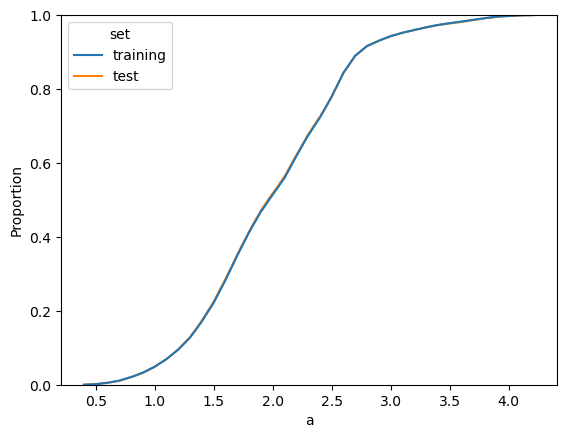

In [15]:
#Plot, as an example, the ECDFs for the variable a for both datasets
feature_name='a'
dataframe=pd.DataFrame({
feature_name: np.concatenate((df_train.loc[:,feature_name],df_test.loc[:,feature_name])),
    'set': ['training']*df_train.shape[0]+['test']*df_test.shape[0]
})
sns.ecdfplot(data=dataframe, x=feature_name, hue='set')

/home/unipi/v.vichi3/miniconda3/envs/py39/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/unipi/v.vichi3/miniconda3/envs/py39/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/unipi/v.vichi3/miniconda3/envs/py39/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='MOID', ylabel='Proportion'>

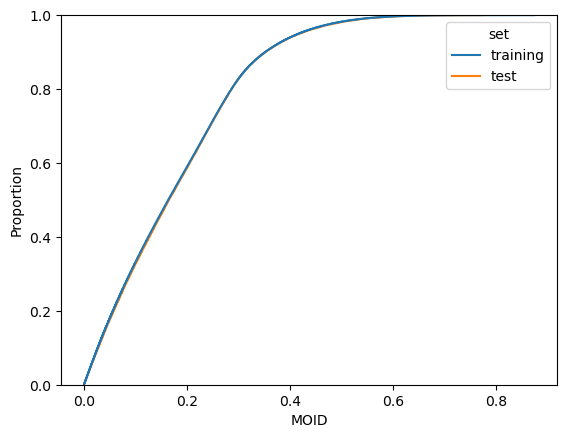

In [25]:
#And for the MOID
feature_name='MOID'
dataframe=pd.DataFrame({
feature_name: np.concatenate((ydf_train.loc[:,feature_name],ydf_test.loc[:,feature_name])),
    'set': ['training']*ydf_train.shape[0]+['test']*ydf_test.shape[0]
})
sns.ecdfplot(data=dataframe, x=feature_name, hue='set')

In [16]:
#Finally, extract the validation set from the training set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [17]:
print("Size of training set:",X_train.shape[0])
print("Size of validation set:", X_val.shape[0])
print("Size of test set:", X_test.shape[0])

Size of training set: 600000
Size of validation set: 150000
Size of test set: 52376


In [19]:
#Save the split dataset for future use
np.save('/home/unipi/v.vichi3/Desktop/X_train', X_train)
np.save('/home/unipi/v.vichi3/Desktop/X_val', X_val)
np.save('/home/unipi/v.vichi3/Desktop/X_test', X_test)
np.save('/home/unipi/v.vichi3/Desktop/y_train', y_train)
np.save('/home/unipi/v.vichi3/Desktop/y_val', y_val)
np.save('/home/unipi/v.vichi3/Desktop/y_test', y_test)